# Data Cleansing and Preprocessing

Importing necessary modules

In [1]:
import pandas as pd
!pip install statistics
import statistics 
import numpy as np
import matplotlib.pyplot as plt
!pip install tensorflow
import tensorflow as tf
from sklearn import preprocessing


keras = tf.keras
df = pd.read_csv('Canadian_climate_history.csv')

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/bin/python -m pip install --upgrade pip' command.


Looking at the data, we can see it includes `LOCAL_DATE` column and the MEAN_TEMPERATURE and TOTAL_PRECIPITATION columns for many different canadian weather centers. However, we only need the `MEAN_TEMPERATURE_VANCOUVER` and `LOCAL_DATE` columns

In [2]:
df.fillna(df.mean(), inplace=True)
df.head(10)

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,01-Jan-1940 00:00:00,-11.4,0.5,2.311584,1.246239,6.565997,3.976417,-8.9,0.0,6.675386,...,5.00718,4.10222,-8.9,0.0,8.9,5.8,-0.41871,0.729778,-20.9,0.0
1,02-Jan-1940 00:00:00,-12.0,0.5,2.311584,1.246239,6.565997,3.976417,-14.5,0.0,6.675386,...,5.00718,4.10222,-13.1,0.3,9.7,7.1,-0.41871,0.729778,-18.4,0.0
2,03-Jan-1940 00:00:00,-12.0,1.0,2.311584,1.246239,6.565997,3.976417,-11.1,0.0,6.675386,...,5.00718,4.10222,-6.1,0.0,7.8,1.0,-0.41871,0.729778,-22.0,0.0
3,04-Jan-1940 00:00:00,-11.4,0.8,2.311584,1.246239,6.565997,3.976417,-11.1,0.3,6.675386,...,5.00718,4.10222,-6.4,0.5,8.1,0.5,-0.41871,0.729778,-20.3,0.0
4,05-Jan-1940 00:00:00,-13.1,0.5,2.311584,1.246239,6.565997,3.976417,-8.1,0.0,6.675386,...,5.00718,4.10222,-7.2,16.5,7.0,0.8,-0.41871,0.729778,-18.7,0.0
5,06-Jan-1940 00:00:00,-9.8,0.0,2.311584,1.246239,6.565997,3.976417,-11.4,3.8,6.675386,...,5.00718,4.10222,-10.3,0.0,5.0,0.0,-0.41871,0.729778,-18.6,0.0
6,07-Jan-1940 00:00:00,-11.4,0.0,2.311584,1.246239,6.565997,3.976417,-14.2,0.0,6.675386,...,5.00718,4.10222,-18.1,0.0,1.4,0.0,-0.41871,0.729778,-14.8,0.0
7,08-Jan-1940 00:00:00,-11.1,1.0,2.311584,1.246239,6.565997,3.976417,-17.2,0.0,6.675386,...,5.00718,4.10222,-14.5,0.0,1.2,0.0,-0.41871,0.729778,-11.9,0.8
8,09-Jan-1940 00:00:00,-15.6,0.0,2.311584,1.246239,6.565997,3.976417,-13.7,0.3,6.675386,...,5.00718,4.10222,-13.3,0.3,2.2,3.3,-0.41871,0.729778,-12.8,0.5
9,10-Jan-1940 00:00:00,-10.6,1.3,2.311584,1.246239,6.565997,3.976417,-15.3,0.0,6.675386,...,5.00718,4.10222,-9.2,0.0,2.5,0.0,-0.41871,0.729778,-10.9,0.8


Here we create `df_van` using the `LOCAL_DATE` and `MEAN_TEMP_VANCOUVER` columns. 

In [3]:
df_van = (df['LOCAL_DATE'], df['MEAN_TEMPERATURE_VANCOUVER'])
df_van = pd.DataFrame(df_van)
df_van = df_van.transpose()
df_van

,LOCAL_DATE,MEAN_TEMPERATURE_VANCOUVER
0,01-Jan-1940 00:00:00,8.9
1,02-Jan-1940 00:00:00,9.7
2,03-Jan-1940 00:00:00,7.8
3,04-Jan-1940 00:00:00,8.1
4,05-Jan-1940 00:00:00,7
...,...,...
29216,28-Dec-2019 00:00:00,5.3
29217,29-Dec-2019 00:00:00,7.1
29218,30-Dec-2019 00:00:00,7.5
29219,31-Dec-2019 00:00:00,8.4


We replace the nan values with the mean of the entire `MEAN_TEMPERATURE_VANCOUVER` column

In [5]:
df_van['MEAN_TEMPERATURE_VANCOUVER'].fillna((df['MEAN_TEMPERATURE_VANCOUVER'].mean()), inplace=True)

We also normalize the `MEAN_TEMPERATURE_VANCOUVER` columns

In [6]:
# Create x, where x the 'scores' column's values as floats
x = df[['MEAN_TEMPERATURE_VANCOUVER']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_van_normal = pd.DataFrame(x_scaled)


We give the normalized dataset the column names of the original non normalized dataset

In [7]:
df_van_normal['LOCAL_DATE'] = df_van['LOCAL_DATE']
df_van_normal.columns = ['MEAN_TEMPERATURE_VANCOUVER', 'LOCAL_DATE']

But there is still one thing to do. We must make the `LOCAL_DATE` column the index, and change it to pandas datetime so its easier to visualize

In [8]:
# convert the 'LOCAL_DATE' column to datetime format 
df_van_normal['LOCAL_DATE'] = pd.to_datetime(df['LOCAL_DATE'])
# set the 'LOCAL_DATE' column as index
df_van_normal.set_index('LOCAL_DATE', inplace=True)
# Check the format of 'LOCAL_DATE' column 
df_van_normal.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29221 entries, 1940-01-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MEAN_TEMPERATURE_VANCOUVER  29221 non-null  float64
dtypes: float64(1)
memory usage: 456.6 KB


We now see that the `LOCAL_DATE` is set to the pandas datetime format

In [9]:
df_van_normal

,MEAN_TEMPERATURE_VANCOUVER
LOCAL_DATE,
1940-01-01,0.545455
1940-01-02,0.564103
1940-01-03,0.519814
1940-01-04,0.526807
1940-01-05,0.501166
...,...
2019-12-28,0.461538
2019-12-29,0.503497
2019-12-30,0.512821


We are now ready to do the naive forecasting bit of the project

# Visualizing the Cleaned Data

Using matplot, we can visualize all the normalized data of vancouver temperatures

<Figure size 1152x720 with 0 Axes>

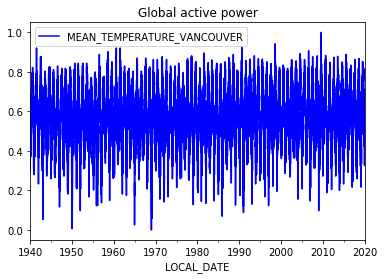

In [10]:
# display the data 
plt.figure(figsize=(16,10))

# all data points
df_van_normal.plot(title='Global active power', color='blue')
plt.show()

All the data is a bit much, so let's only see one year of the normalized mean temperatures in vancouver

<Figure size 1152x720 with 0 Axes>

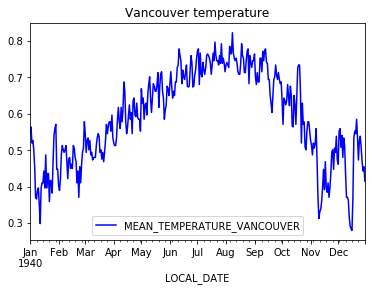

In [11]:
# can plot a slice of daily data
end_days = 365 # 1 year

plt.figure(figsize=(16,10))
df_van_normal[0:end_days].plot(title='Vancouver temperature', color='blue') 
plt.show()

Let's see 5 years of data to get more of a trend in the data. We can see that the temperature goes up by quite a bit in Summer, as expected and goes to a low in winter

<Figure size 1152x720 with 0 Axes>

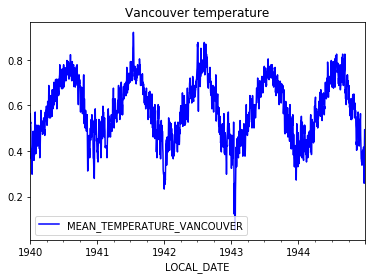

In [12]:
# can plot a slice of daily data
end_days = 365*5 # 1 year*5 = 5 years


plt.figure(figsize=(16,10))
df_van_normal[0:end_days].plot(title='Vancouver temperature', color='blue') 
plt.show()

# Training, Validation and Test data

Here we create a make_time_series function. It makes yearly time series using which we can train our machine learning models on. 

In [13]:
def make_time_series(df, years, freq='D', start_idx=0):
    '''Creates as many time series as there are complete years. This code
       accounts for the leap year, 2008.
      :param mean_power_df: A dataframe of global power consumption, averaged by day.
          This dataframe should also be indexed by a datetime.
      :param years: A list of years to make time series out of, ex. ['2007', '2008'].
      :param freq: The frequency of data recording (D = daily)
      :param start_idx: The starting dataframe index of the first point in the first time series.
          The default, 16, points to '2017-01-01'. 
      :return: A list of pd.Series(), time series data.
      '''
    
    # store time series
    time_series = []
    
    # store leap year in this dataset
    leap = leap = ('1940', '1944', '1948', '1952', '1956', '1960', '1964', '1968','1972', '1976', '1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008', '2012', '2016', '2020')

    # create time series for each year in years
    for i in range(len(years)):

        year = str(years[i])

        if(year in leap):
            end_idx = start_idx + 366
        else:
            end_idx = start_idx + 365

        # create start and end datetimes
        t_start = year + '-01-01' # Jan 1st of each year = t_start
        t_end = year + '-12-31' # Dec 31st = t_end

        # get global consumption data
        data = df[start_idx:end_idx]

        # create time series for the year
        index = pd.date_range(start=t_start, end=t_end, freq = freq)
        time_series.append(pd.Series(data=data.values.flatten(), index=index))
        
        start_idx = end_idx
    
    # return list of time series
    return time_series
    
    

We make a list of years we want to make a time series of. We will make time series out of the 1940-2009 data and use the rest of the data, start of 2010 - end of 2019 as test 

In [14]:
years = []

for i in range(1940, 2010):
    years.append(i)

We make series using the dataset and the years

In [15]:
train_series = make_time_series(df = df_van_normal, years = years)

Lets plot the first year (Jan-Dec 1940)

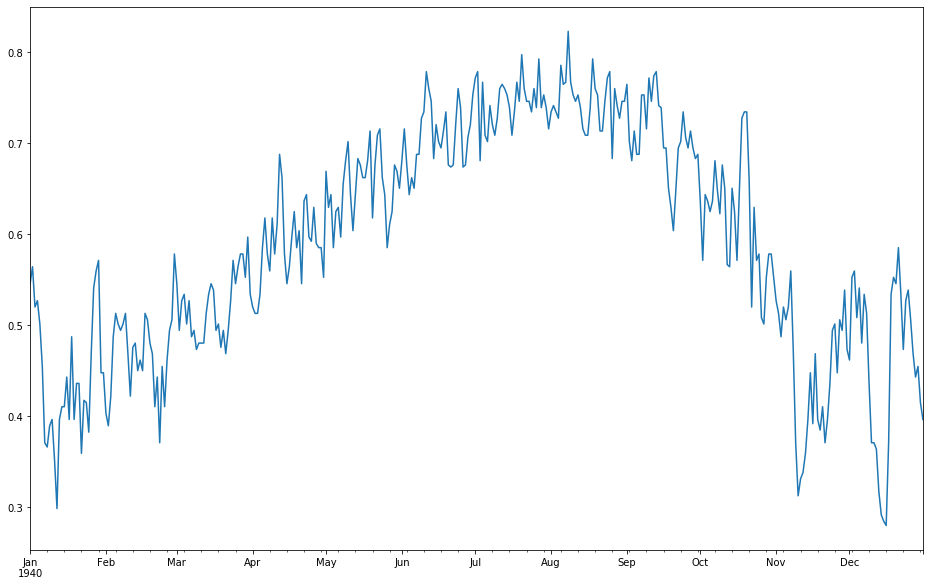

In [16]:
plt.figure(figsize=(16,10))

train_series[0].plot()
plt.show()

Defining test years

In [19]:
test_years = []

for i in range(2010, 2020):
    test_years.append(i)

Making test series

In [20]:
test_series_sep = make_time_series(df = df_van_normal, years = test_years)

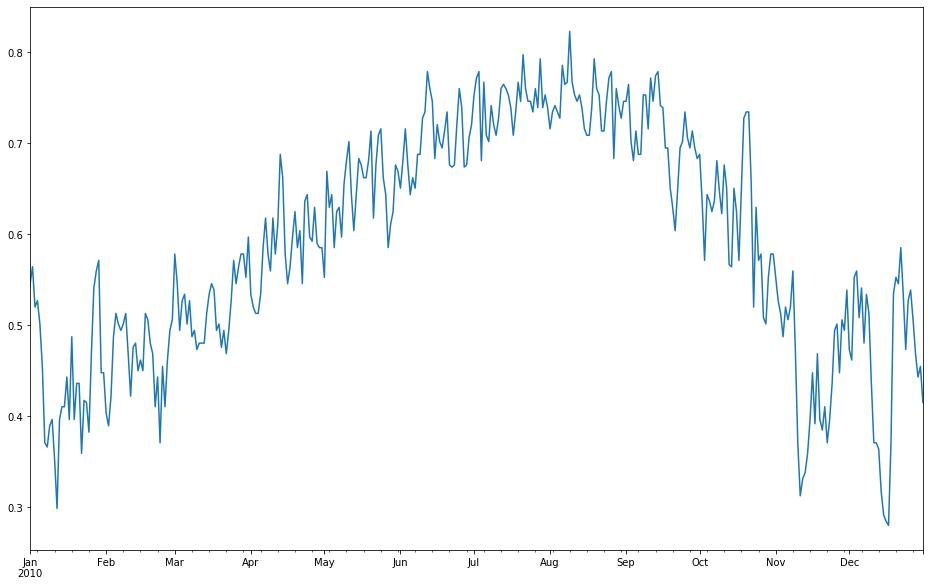

In [21]:
plt.figure(figsize=(16,10))
test_series_sep[0].plot()

# Moving Average

Creating moving average function as benchmark for model

Function that will plot a time series

In [22]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

Getting rid of all nan values in `df_van_normal` and performing rolling/moving average

In [23]:
df_van_normal.fillna(df_van_normal.values.mean(), inplace=True)
tester = pd.Series(test_series.values.flatten())
rolled = tester.rolling(window=3)
moving_averages = rolled.mean()

Making new list `without_nans` with all the same values as `moving_averages_list` but without nans

In [24]:
window_size = 3
moving_averages_list = moving_averages.tolist()
without_nans = []
for i in moving_averages_list:
    if np.isnan(i):
        x = 0.5
        without_nans.append(x)
    else:
        without_nans.append(i)

Getting mse of each year of time series and finding the mean to get our combined mse for all 10 years

In [69]:
mse = []
for i in range(10):
    mse.append(keras.metrics.mean_squared_error(test_series_sep[i], without_nans[i]).numpy())

score = 0
for element in mse:
    score += element

score /= 10
score

0.028201818652451038

The moving average got an accuracy of `0.028`. Time to beat that with the ML model

# Machine Learning

Function to write a full json dataset

In [27]:
# import json for formatting data
import json
import os # and os for saving

def write_json_dataset(time_series, filename): 
    with open(filename, 'wb') as f:        # for each of our times series, there is one JSON line

        for ts in time_series:
            json_line = json.dumps(series_to_json_obj(ts)) + '\n'
            json_line = json_line.encode('utf-8')
            f.write(json_line)
    print(filename + ' saved.')

Making directory to save training and testing data

In [28]:
# save this data to a local directory
data_dir = 'json_temp_data'

# make data dir, if it does not exist
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

Function to convert series to json object

In [31]:
def series_to_json_obj(ts):
    '''Returns a dictionary of values in DeepAR, JSON format.
       :param ts: A single time series.
       :return: A dictionary of values with "start" and "target" keys.
       '''
    # get start time and target from the time series, ts
    json_obj = {"start": str(ts.index[0]), "target": list(ts)}
    return json_obj


Saving training and testing data to directory

In [32]:
train_key = os.path.join(data_dir, 'train.json')
test_key = os.path.join(data_dir, 'test.json')

# write train/test JSON files
write_json_dataset(train_series, train_key)        
write_json_dataset(test_series_sep, test_key)

json_temp_data/train.json saved.
json_temp_data/test.json saved.


importing needed libraries

In [33]:
import boto3
import sagemaker
from sagemaker import get_execution_role

Making an S3 bucket

In [34]:
# session, role, bucket
sagemaker_session = sagemaker.Session()
role = get_execution_role()

bucket = sagemaker_session.default_bucket()


Uploading data to s3

In [35]:
# general prefix
prefix='deepar-temp-data'

# *unique* train/test prefixes
train_prefix   = '{}/{}'.format(prefix, 'train')
test_prefix    = '{}/{}'.format(prefix, 'test')

# uploading data to S3, and saving locations
train_path  = sagemaker_session.upload_data(train_key, bucket=bucket, key_prefix=train_prefix)
test_path   = sagemaker_session.upload_data(test_key,  bucket=bucket, key_prefix=test_prefix)

Checking locations

In [36]:
# check locations
print('Training data is stored in: '+ train_path)
print('Test data is stored in: '+ test_path)

Training data is stored in: s3://sagemaker-us-west-1-560434839557/deepar-temp-data/train/train.json
Test data is stored in: s3://sagemaker-us-west-1-560434839557/deepar-temp-data/test/test.json


Getting image region

In [37]:
from sagemaker.amazon.amazon_estimator import get_image_uri

image_name = get_image_uri(boto3.Session().region_name, # get the region
                           'forecasting-deepar') # specify image


'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


Creating Estimator Object

In [38]:
from sagemaker.estimator import Estimator

# dir to save model artifacts
s3_output_path = "s3://{}/{}/output".format(bucket, prefix)

# instantiate a DeepAR estimator
estimator = Estimator(sagemaker_session=sagemaker_session,
                      image_name=image_name,
                      role=role,
                      train_instance_count=1,
                      train_instance_type='ml.c5.xlarge',
                      output_path=s3_output_path
                      )

Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.


Setting Hyperparameters

In [39]:
freq='D'
prediction_length=166 # days
context_length=4 # days

hyperparameters = {
    "epochs": "263",
    "time_freq": freq,
    "prediction_length": str(prediction_length),
    "context_length": str(context_length),
    "num_cells": "177",
    "num_layers": '2',
    "mini_batch_size": "5000",
    "learning_rate": "0.01",
    "dropout_rate":'0.10',
    'embedding_dimension':'10',
    '_num_gpus':'auto',
    'test_quantiles':'[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]',
    '_tuning_objective_metric': 'test:RMSE',
    'num_eval_samples': '100',
    '_num_kv_servers': 'auto',
    'mini_batch_size': '208',
    'likelihood': 'student-t',
    'num_dynamic_feat': 'auto', 
    'cardinality': 'auto', 
    '_num_gpus': 'auto', 
    'prediction_length': '166', 
    'context_length': '4', 
    '_kvstore': 'auto'}

In [40]:
# set the hyperparams
estimator.set_hyperparameters(**hyperparameters)

Attaching previously trained model to estimator (don't want to train it again, you can see all its parameters in the above cell)

In [41]:
%%time
# train and test channels
data_channels = {
    "train": train_path,
    "test": test_path
}

# fit the estimator
estimator.attach('forecasting-deepar-2020-09-19-18-36-00-609')

Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.


2020-09-19 20:32:38 Starting - Preparing the instances for training
2020-09-19 20:32:38 Downloading - Downloading input data
2020-09-19 20:32:38 Training - Training image download completed. Training in progress.
2020-09-19 20:32:38 Uploading - Uploading generated training model
2020-09-19 20:32:38 Completed - Training job completedArguments: train
[09/19/2020 18:38:18 INFO 140356611028800] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'num_dynamic_feat': u'auto', u'dropout_rate': u'0.10', u'mini_batch_size': u'128', u'test_quantiles': u'[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'num_eval_samples': u'100', u'learning_rate': u'0.001', u'num_cells': u'40', u'num_layers': u'2', u'embedding_dimension': u'10', u'_kvstore': u'auto', u'_num_kv_servers': u'auto', u'cardinality': u'auto', u'likelihood': u'student-t', u'early_stopping_patience': u''}
[09/19/2020 

Attaching saved training job to estimator

In [42]:
estimator = sagemaker.estimator.Estimator.attach('forecasting-deepar-2020-09-16-01-46-26-545')

Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.


2020-09-16 03:43:08 Starting - Preparing the instances for training
2020-09-16 03:43:08 Downloading - Downloading input data
2020-09-16 03:43:08 Training - Training image download completed. Training in progress.
2020-09-16 03:43:08 Uploading - Uploading generated training model
2020-09-16 03:43:08 Completed - Training job completedArguments: train
[09/16/2020 01:48:50 INFO 140162782930752] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'num_dynamic_feat': u'auto', u'dropout_rate': u'0.10', u'mini_batch_size': u'128', u'test_quantiles': u'[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'num_eval_samples': u'100', u'learning_rate': u'0.001', u'num_cells': u'40', u'num_layers': u'2', u'embedding_dimension': u'10', u'_kvstore': u'auto', u'_num_kv_servers': u'auto', u'cardinality': u'auto', u'likelihood': u'student-t', u'early_stopping_patience': u''}
[09/16/2020 

Deploying model

In [43]:
predictor = estimator.deploy(
    initial_instance_count=1,
    instance_type='ml.m4.xlarge',
    content_type="application/json")# specify that it will accept/produce JSON

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.
Using already existing model: forecasting-deepar-2020-09-16-01-46-26-545


---------------!

Applying batch transform to `estimator`

In [44]:
transformer = estimator.transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')
transformer.transform(test_path, split_type='Line')
transformer.wait()

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.
Using already existing model: forecasting-deepar-2020-09-16-01-46-26-545


................................2020-09-25T16:46:36.150:[sagemaker logs]: MaxConcurrentTransforms=4, MaxPayloadInMB=6, BatchStrategy=SINGLE_RECORD
Arguments: serve
No handlers could be found for logger "root"
[09/25/2020 16:46:35 INFO 140201474492224] Estimated memory required per model 85MB.
[09/25/2020 16:46:35 INFO 140201474492224] Estimated available memory 14796MB.
[09/25/2020 16:46:35 INFO 140201474492224] Estimated maximum number of workers for the available memory is 173.
[09/25/2020 16:46:35 INFO 140201474492224] Using 4 workers
[09/25/2020 16:46:35 INFO 140201474492224] loading entry points
[09/25/2020 16:46:35 INFO 140201474492224] Prediction endpoint operating in batch mode
[09/25/2020 16:46:35 INFO 140201474492224] loaded request iterator application/jsonlines
[09/25/2020 16:46:35 INFO 140201474492224] loaded response encoder application/jsonlines
[09/25/2020 16:46:35 INFO 140201474492224] loaded model class model
[09/25/2020 16:46:35 WARNING 140201474492224] Requesting co

Getting output from model

In [45]:
!aws s3 cp --recursive $transformer.output_path $data_dir
data = os.path.join(data_dir, 'test.json.out')

download: s3://sagemaker-us-west-1-560434839557/forecasting-deepar-2020-09-16-01-46-26--2020-09-25-16-41-26-900/test.json.out to json_temp_data/test.json.out


Reading model output into a CSV file

In [46]:
predictions_orig = pd.read_csv(data, header=None)

Transposing output csv file

In [47]:
predictions_orig_transposed = predictions_orig.transpose()

Viewing transposed csv file

In [48]:
predictions = predictions_orig_transposed 
#predictions.index = df_van_normal[25568:29220].index
predictions

,0
0,"{""quantiles"":{""0.9"":[0.4988225698"
1,0.541064
2,0.554976
3,0.565387
4,0.574226
...,...
16586,0.519231
16587,0.516828
16588,0.519977
16589,0.512825


Cleaning CSV file (to get rid of json characters, `pd.read_json()` did not work for me. Kept getting errors, asked a mentor for help but didn't get a reponse)

In [49]:
predictions[0] = [str(x).replace('}', '') for x in predictions[0].values]
predictions[0] = [str(x).replace('{', '') for x in predictions[0].values]
predictions[0] = [str(x).replace('[', '') for x in predictions[0].values]
predictions[0] = [str(x).replace(']', '') for x in predictions[0].values]
predictions[0] = [str(x).replace('{', '') for x in predictions[0].values]
predictions[0] = [str(x).replace('}', '') for x in predictions[0].values]
predictions[0] = [str(x).replace(':', '') for x in predictions[0].values]
predictions[0] = [str(x).replace('"quantiles""0.9"', '') for x in predictions[0].values]
predictions[0] = [str(x).replace('mean', '') for x in predictions[0].values]

predictions[0] = [str(x)[0:4] for x in predictions[0].values]

del predictions[0][0]
del predictions[0][166]

predictions[[0]]

,0
0,0.49
1,0.54
2,0.55
3,0.56
4,0.57
...,...
16586,0.51
16587,0.51
16588,0.51
16589,0.51


Converting all datapoints in the file to float (as they were converted to string when I was getting rid of json characters)

In [50]:
predictions[0] = predictions[0].astype('float')

Making list with all non nan values in csv file, calling it `no_nans`

In [51]:
no_nans = []
for i in list(predictions[0]):
    if np.isnan(i):
        x = 0.5
        no_nans.append(x)
    else:
        no_nans.append(i)

Getting average MSE for all the 10 years of predictions

In [52]:
mse = []
for i in range(10):
    mse.append(keras.metrics.mean_squared_error(test_series_sep[i], no_nans[i]).numpy())

score = 0
for element in mse:
    score += element

score /= 10
score

0.019151047617197037

# Final MSE: 0.01915

Lower than the moving average, model ready for production, task completed, YAY!

ps: I was struggling to understand things from the course but this project cleared all my doubt. Thank you also to the Udacity Mentors for answering my many questions quickly. I couldn't have done this project without them.

Also, thank you for marking my project